# MILESTONE 2

In this milestone we will get to *finally* minipulate the data we harvested

---

**Group File**

- Prajeet
- Ayaka
- Carlos

## Objectives to complete
1. Task 3 Chaining
2. Task 4 Analysis
3. Task 5 Research

#### Research Questions

We will get to answer the research questions we asked during milestone1. We are interested in what type of genre of games sell the best in the different regions, according to the different years. By studying this topic, we want to analyse the various trends that take place in the regions included in the dataset. Which publishers are most popular among critics and users alike?

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

data ='../../data/raw/Gamesales.csv'
dfu = unprocessed(data)
#dfu

In [2]:
dfp = load_and_process(data)
#dfp

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### Number of sales by region based on the Year_of_Release and Genre

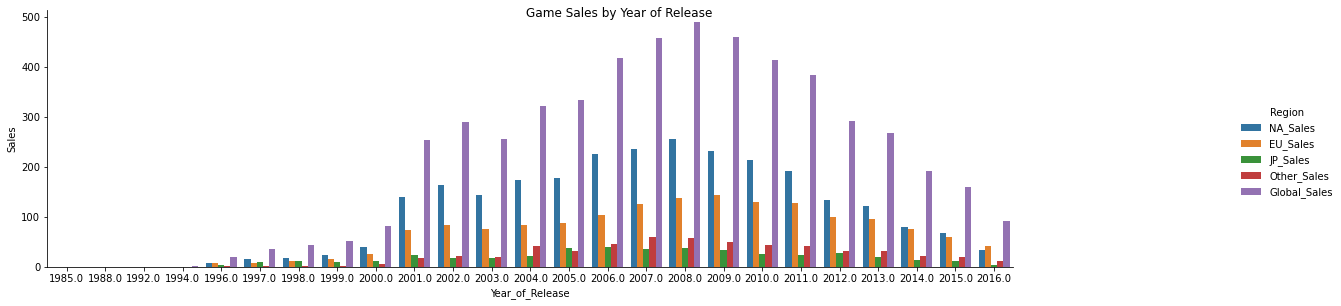

In [15]:
df1 = dfp.groupby('Year_of_Release', as_index=False).sum()
df2 = pd.melt(df1, id_vars="Year_of_Release", value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"],var_name ='Region', value_name ='Sales')
ax = sns.catplot(x="Year_of_Release",y="Sales",hue="Region",data = df2,kind ="bar")
ax.fig.suptitle("Game Sales by Year of Release")
ax.fig.set_size_inches(20,4)
plt.show()

The number of sales per region increases steadily throughout time, more precisely between 1996 and 2008. After the latter date, according to the data, the number of sales starts to decrease until the end of dates present in the dataset. 

It can also be noted that from the specific regions, NA_region contains the bigger number of sales compared to the other regions. Japan is the region which contains the smallest number of sales overall in this dataset. 


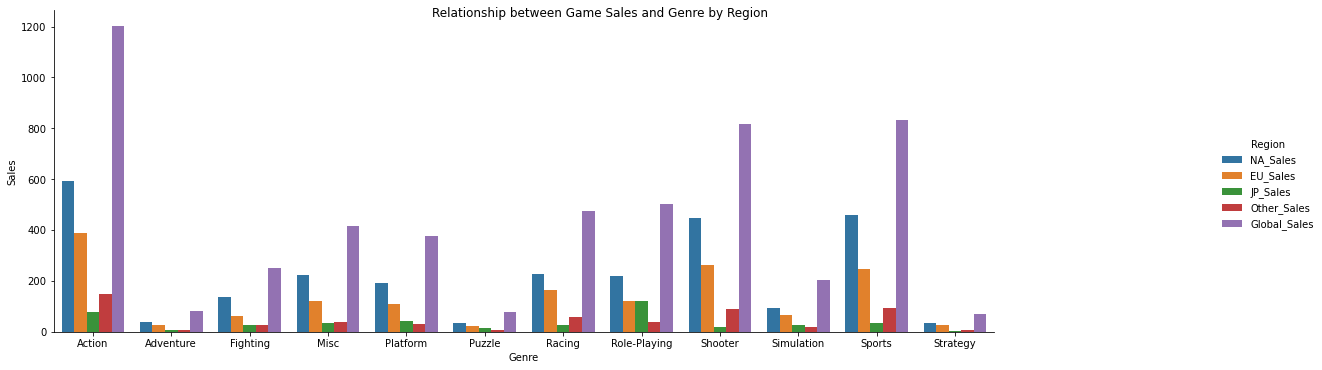

In [5]:
df3 = dfp.groupby('Genre', as_index=False).sum()
df4 = pd.melt(df3, id_vars="Genre", value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"],var_name ='Region', value_name ='Sales')
ax = sns.catplot(x="Genre",y="Sales",hue="Region",data = df4,kind ="bar")
ax.fig.set_size_inches(20,5)
ax.fig.suptitle("Relationship between Game Sales and Genre by Region")
plt.show()

Action has top sales in the world except for Japan. The most popular genre in Japan is Role-Playing. Adventure, Puzzle, and Strategy have the lowest sales.

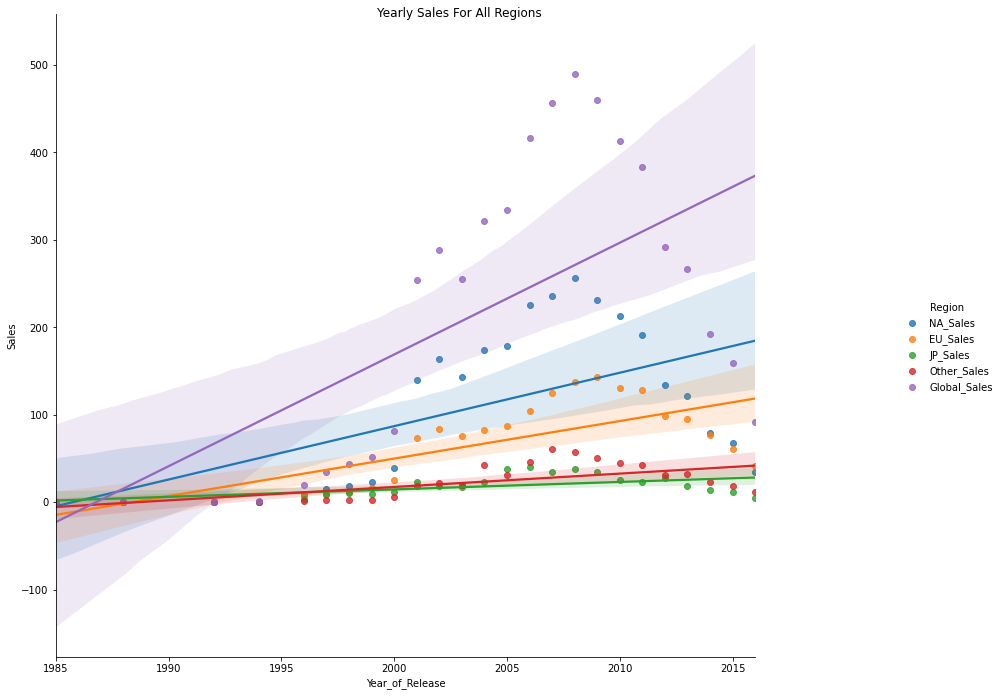

In [6]:
#df2
ax = sns.lmplot(data=df2, x="Year_of_Release",y="Sales",hue="Region")
ax.fig.set_size_inches(15,10)
ax.fig.suptitle("Yearly Sales For All Regions")
plt.show()

Plotting the yearly sales for each region's trendlines shows that game sales are steadily on a net incline, even though it seems that sales have been declining as of 2008. We can only assume that this is due to the fact that games are now being sold digitally and this data set on works includes sales of physical copies. The dataset also does not incorporate much of PC games and none of mobile games which are a huge portion of the market. Otherwise, even without inclusion of digitally sold games, the net incline means games sales have been doing fairly well for the past two and half decades.

### Weighted Score based on 45% of critic score and 55% User Score


In [7]:
dfp.Critic_Score = dfp.Critic_Score.astype(float)
dfp.User_Score = dfp.User_Score.astype(float)
dfp["Weighted Score"] = dfp["Critic_Score"]*0.45 + dfp["User_Score"]*0.55
#dfp

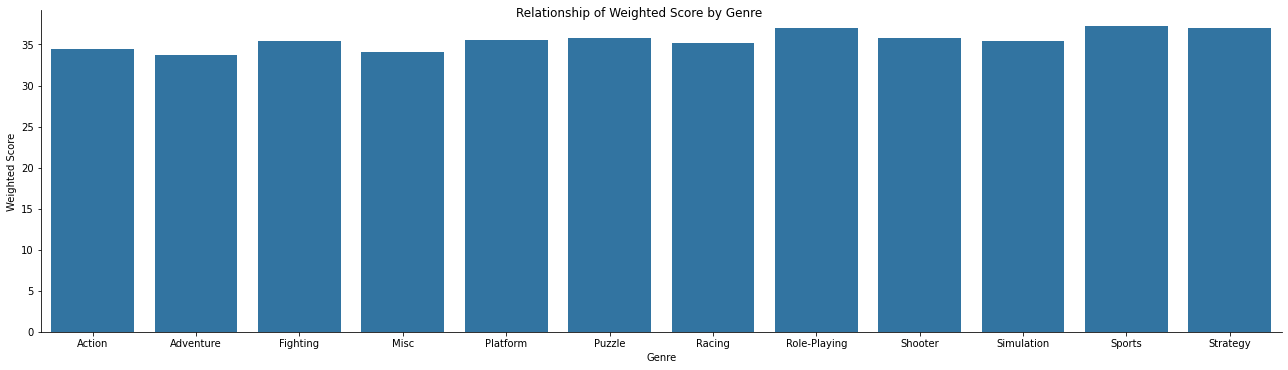

In [8]:
df3 = dfp.groupby('Genre', as_index=False).mean()
ax = sns.catplot(x="Genre",y="Weighted Score",data = df3,kind ="bar",color="tab:blue")
ax.fig.suptitle("Relationship of Weighted Score by Genre")
ax.fig.set_size_inches(20,5)
plt.show()

The mean of the Weighted Score grouped by Genre shows that the averages for each genre are pretty close. However, although action is the top sales game, the mean of the score is slightly low compared to other categories.

<AxesSubplot:title={'center':'BoxPlot of Weighted Scores by Genre'}, xlabel='Weighted Score', ylabel='Genre'>

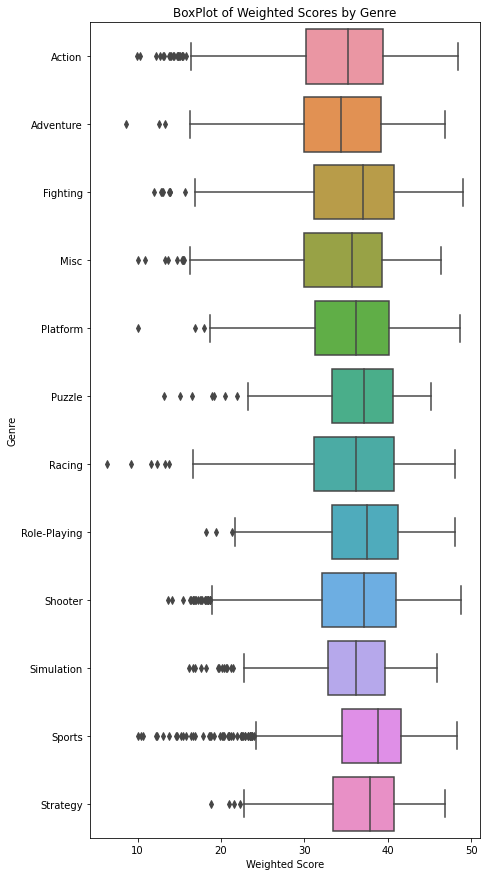

In [9]:
a4_dims = (7, 15)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="Weighted Score", y="Genre", data=dfp)
ax.set_title('BoxPlot of Weighted Scores by Genre')
ax.set_xlabel("Weighted Score")
ax.set_ylabel("Genre")
ax

Although the averages of weighted scores group by genre do not have much difference, this figure shows that the weighted score for Racing has a huge difference between its maximum and minimum.

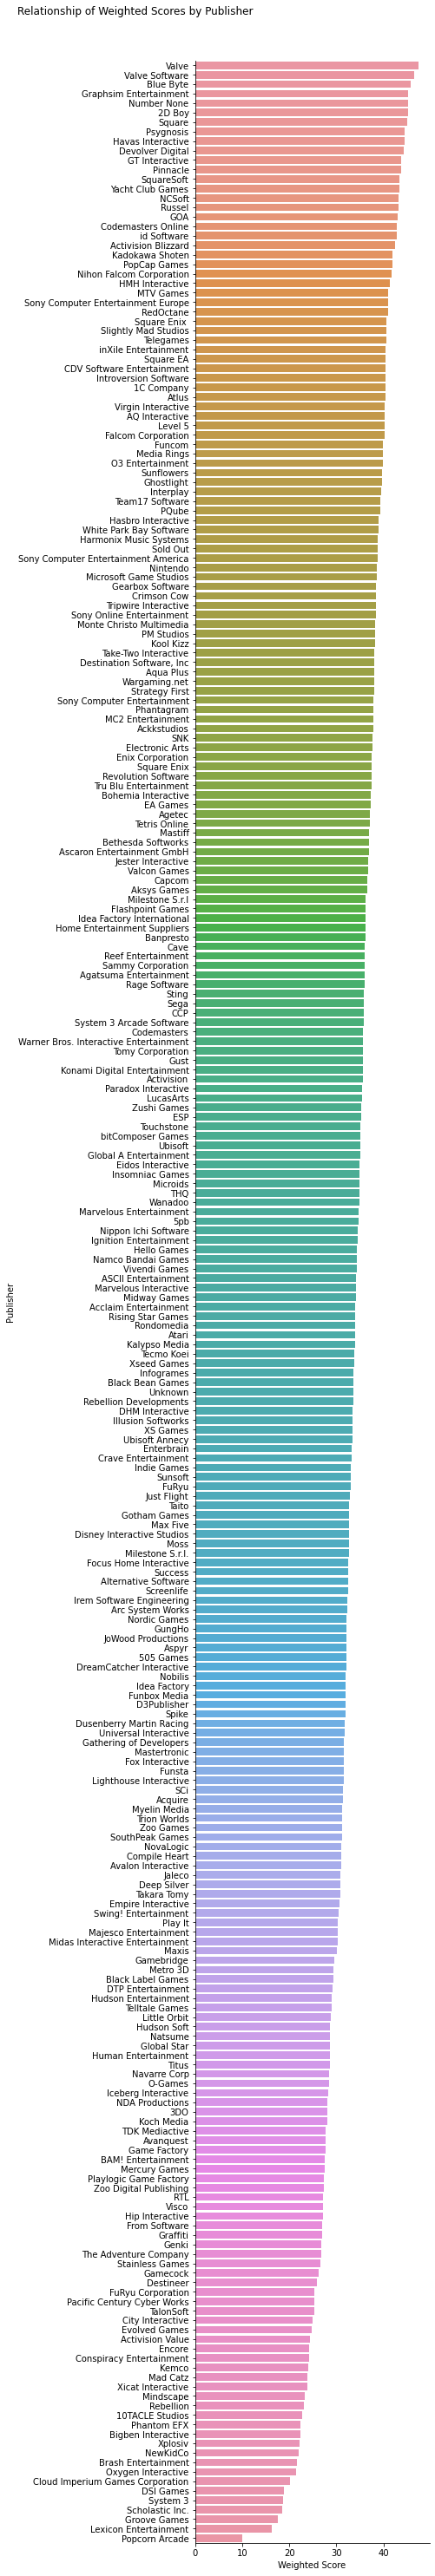

In [10]:
df5 = dfp.groupby('Publisher', as_index=False).mean()
df5 = df5.sort_values("Weighted Score",ascending = False)
ax = sns.catplot(x="Weighted Score",y="Publisher",data = df5,kind ="bar" )
ax.fig.suptitle("Relationship of Weighted Scores by Publisher")
ax.fig.set_size_inches(10,45)
plt.show()

If we decided to look at the different Publishers in order to get a sense of the type of why certain genres are more popular than others, we notice that in based on weighted score, Valve is presented as the most popular Publisher in the dataset.

Valve is particularly known for developing multiple action and role-playing games that are particularly popular. 

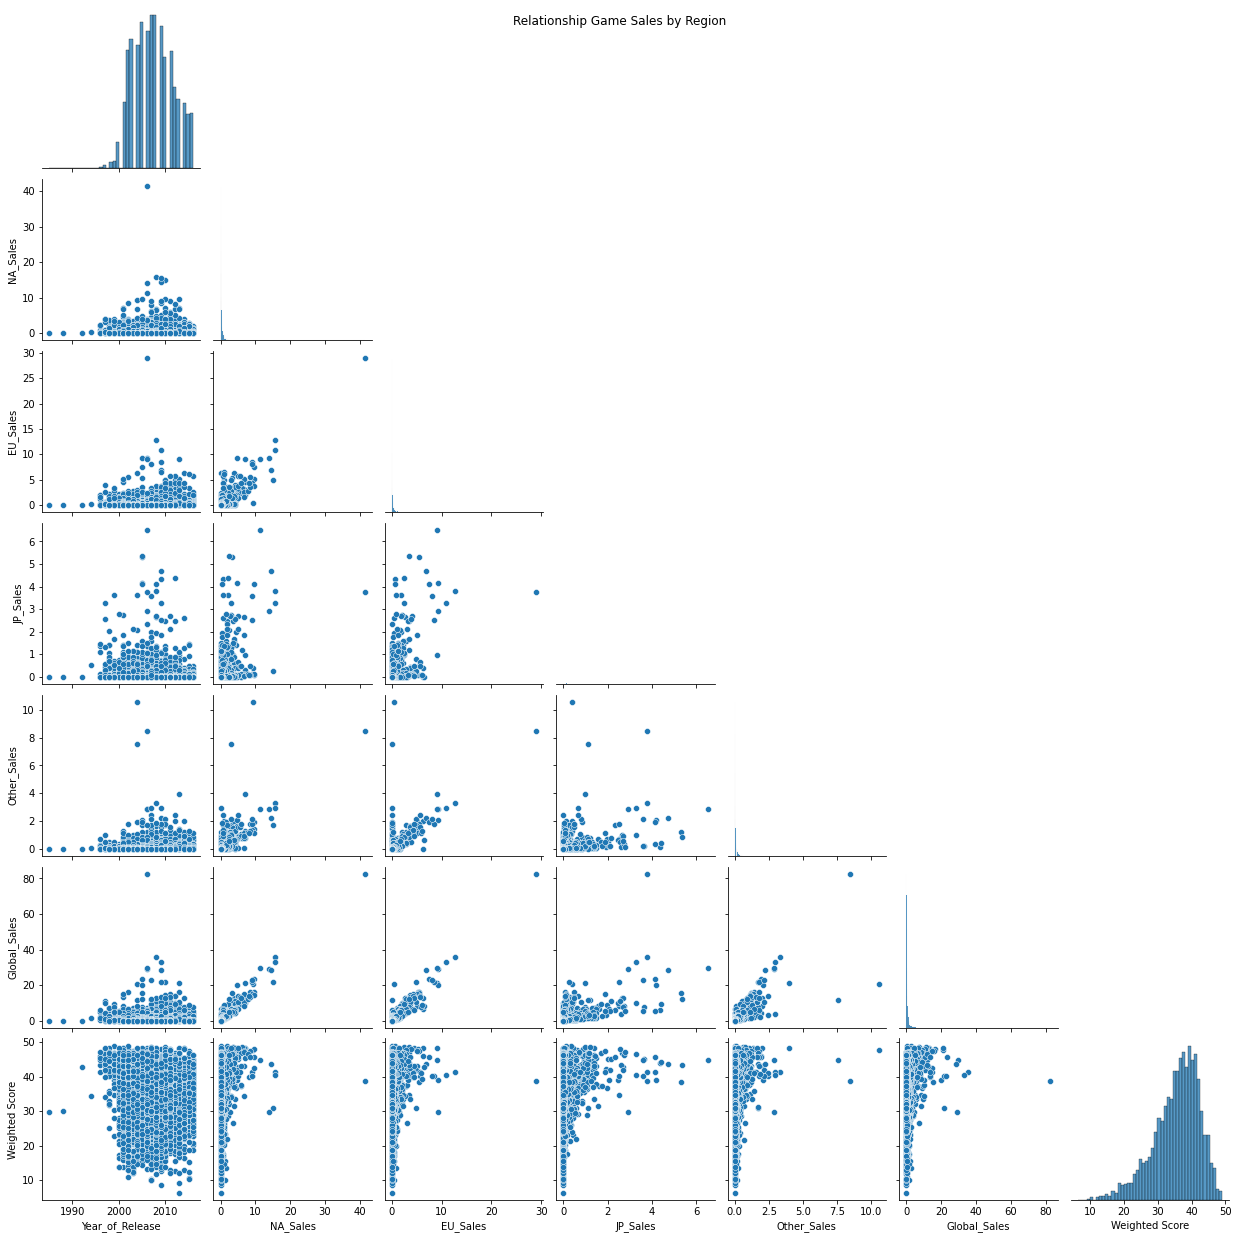

In [11]:
ax = sns.pairplot(
    dfp,
    corner=True,
    x_vars=["Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales","Weighted Score"],
    y_vars=["Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales","Weighted Score"],
    
)
ax.fig.suptitle("Relationship Game Sales by Region")
ax

Before 2000, the critic and user scores are over 30. but after the year, more and more games got reviewed and it has a wider score distribution. You can see that the more games that have high sales when the weighted score goes up. It looks most games that have high sales in Japan are unpopular in other countries.